In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind, spearmanr
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
df = pd.read_excel('/content/ofertas-publicas-coordenadores-15-10-2024-14-05-06.xls')

In [2]:
df.head()

,Código da oferta,Coordenador,CNPJ coordenador,Coordenador líder,Emissor,CNPJ emissor,Nome de operação,Emissão,Data de encerramento da oferta,Status da oferta,Valor total encerrado,TVM,Número de coordenadores,Regime de colocação,Rito,Tipo requerimento,Quantidade total emitida da oferta,Valor total emitido,Quantidade total encerrada da oferta,Tempo duração oferta,Setor ANBIMA emissor ou devedor,Segmento ANBIMA emissor ou devedor,Data da deliberação que aprovou a oferta,Data de início da oferta,Data de registro da oferta,Lastro,Risco crédito,Lei 12431
0,RJ-2016-07894,Banco itau bba s.a.,17298092000130,Sim,Eco securitizadora de direitos creditorios do ...,10753164000143,CRA/2016/024 : ;CRA/2016/023 :,1,03/01/2017,Encerrada,1.250000e+09,CRA,1,NaN,ICVM/400 - Registrada,NaN,1250000.0,1.250000e+09,1250000.0,7.0,NaN,NaN,NaN,27/12/2016,27/12/2016,CRA/2016/024 : ;CRA/2016/023 :,CRA/2016/024 : ;CRA/2016/023 :,Não se aplica
1,RJ-2016-07954,Banco bradesco bbi s.a.,06271464000119,Sim,Cibrasec-companhia brasileira de securitizacao,2105040000123,CRI/2016/036 :,2,03/01/2017,Encerrada,3.000000e+08,CRI,1,NaN,ICVM/400 - Registrada,NaN,300000.0,3.000000e+08,300000.0,8.0,NaN,NaN,NaN,26/12/2016,26/12/2016,CRI/2016/036 : Financiamento Imobiliário,CRI/2016/036 : Concentrado,NaN
2,SP-2017-50128,Banco itau bba s.a.,17298092000130,Sim,Lojas riachuelo sa,33200056000149,Não se aplica,2,03/01/2017,Encerrada,4.750000e+08,Debêntures,1,NaN,ICVM/476 - Esforços Restritos,NaN,475000.0,4.750000e+08,475000.0,11.0,Comércio atacadista e varejista,Varejo de diversos produtos,NaN,23/12/2016,23/12/2016,Não se aplica,Não se aplica,Não para todas as séries
3,SP-2017-00009,Banco bradesco bbi s.a.,06271464000119,Sim,Andrade gutierrez participacoes s/a,4031960000170,Não se aplica,4,06/01/2017,Encerrada,1.600000e+09,Debêntures,1,NaN,ICVM/476 - Esforços Restritos,NaN,1600000.0,1.600000e+09,1600000.0,4.0,Empreendimentos e participações,Outras participações,NaN,02/01/2017,02/01/2017,Não se aplica,Não se aplica,Não para todas as séries
4,SP-2017-50130,Banco itau bba s.a.,17298092000130,Sim,Prime incorporacoes e construcoes s/a.,409834000155,Não se aplica,2,06/01/2017,Encerrada,2.200000e+08,Debêntures,1,NaN,ICVM/476 - Esforços Restritos,NaN,220000.0,2.200000e+08,220000.0,8.0,Construção civil,Construtora e incorporadora,NaN,29/12/2016,29/12/2016,Não se aplica,Não se aplica,Não para todas as séries


In [3]:
df = df.drop(['CNPJ coordenador', 'Nome de operação', 'Status da oferta', 'Valor total encerrado', 'Lastro', 'Risco crédito', 'Lei 12431','CNPJ emissor','Tipo requerimento'], axis=1)

In [4]:
df.describe()


,Emissão,Número de coordenadores,Quantidade total emitida da oferta,Valor total emitido,Quantidade total encerrada da oferta,Tempo duração oferta
count,8920.000000,8920.000000,8.920000e+03,8.920000e+03,8.920000e+03,8913.000000
mean,30.054036,2.227130,1.618811e+07,5.433077e+08,1.688244e+07,136.685179
std,63.199244,1.730524,1.669872e+08,8.752689e+08,1.725684e+08,7043.943904
min,1.000000,1.000000,3.900000e-03,1.000000e+05,3.900000e-03,-239.000000
25%,1.000000,1.000000,5.000000e+04,6.000000e+07,5.000000e+04,6.000000
50%,4.000000,1.000000,2.000000e+05,2.154520e+08,2.000000e+05,14.000000
75%,16.000000,3.000000,7.500000e+05,7.000000e+08,7.500000e+05,37.000000
max,462.000000,11.000000,5.084656e+09,1.400000e+10,5.084656e+09,664933.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920 entries, 0 to 8919
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Código da oferta                          8920 non-null   object 
 1   Coordenador                               8920 non-null   object 
 2   Coordenador líder                         8920 non-null   object 
 3   Emissor                                   8920 non-null   object 
 4   Emissão                                   8920 non-null   int64  
 5   Data de encerramento da oferta            8920 non-null   object 
 6   TVM                                       8920 non-null   object 
 7   Número de coordenadores                   8920 non-null   int64  
 8   Regime de colocação                       2318 non-null   object 
 9   Rito                                      8920 non-null   object 
 10  Quantidade total emitida da oferta  

In [6]:
import re
import unicodedata
# Função alternativa para remover acentos manualmente
def remove_acento(texto):
    # Normalizar o texto para remover acentos
    texto = unicodedata.normalize('NFD', texto).encode('ascii', 'ignore').decode('utf-8')
    return str(texto)
# Ajustar a função de normalização para remover acentos manualmente
def normalize_coordenador_alternative(nome):
    nome = remove_acento(nome.strip().lower())
    nome = nome.replace('s/a', 's.a.').replace('titulos', 'títulos')
    return nome
# Aplicar a normalização alternativa ao DataFrame
df['Coordenador'] = df['Coordenador'].apply(normalize_coordenador_alternative)

In [7]:
# Converter as colunas de data automaticamente
df['Data de encerramento da oferta'] = pd.to_datetime(df['Data de encerramento da oferta'], errors='coerce')
df['Data da deliberação que aprovou a oferta'] = pd.to_datetime(df['Data da deliberação que aprovou a oferta'], errors='coerce')
df['Data de início da oferta'] = pd.to_datetime(df['Data de início da oferta'], errors='coerce')
df['Data de registro da oferta'] = pd.to_datetime(df['Data de registro da oferta'], errors='coerce')

# Converter para o formato brasileiro (dia-mês-ano)
df['Data de encerramento da oferta'] = df['Data de encerramento da oferta'].dt.strftime('%d-%m-%Y')
df['Data da deliberação que aprovou a oferta'] = df['Data da deliberação que aprovou a oferta'].dt.strftime('%d-%m-%Y')
df['Data de início da oferta'] = df['Data de início da oferta'].dt.strftime('%d-%m-%Y')
df['Data de registro da oferta'] = df['Data de registro da oferta'].dt.strftime('%d-%m-%Y')

# Módulo 1: Análise de Coordenadores e Impacto na Captação
Introdução:
Este módulo explora a influência dos coordenadores nas ofertas de debêntures, CRIs e CRAs, investigando como sua participação afeta o sucesso das captações. A análise examina desde a frequência de participação dos coordenadores até a relação entre o número de coordenadores e o valor total emitido. O objetivo é identificar padrões na atuação dos coordenadores e estratégias eficazes que maximizam o sucesso das ofertas.


**1.	Quais coordenadores aparecem com maior frequência nas ofertas de debêntures, CRIs e CRAs?**

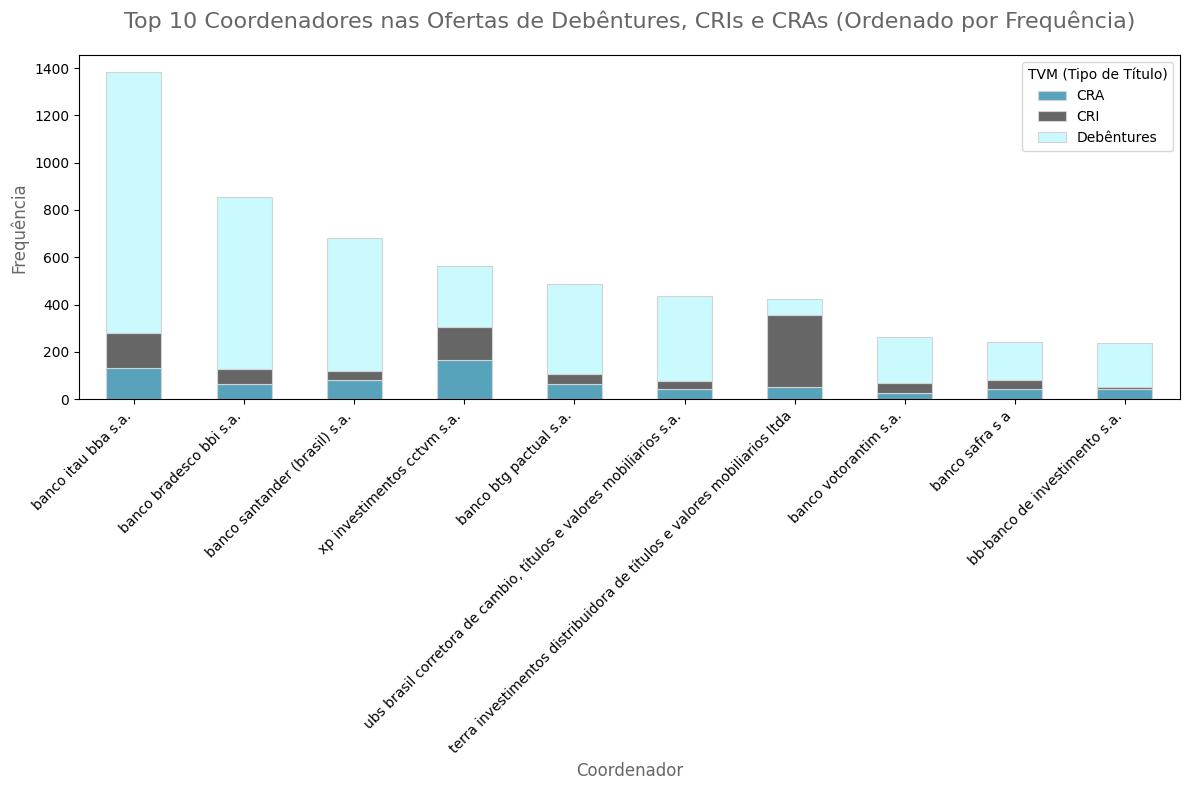

In [8]:
# Agrupando o DataFrame por Coordenador e TVM para obter as frequências
frequencia_df = df.groupby(['Coordenador', 'TVM']).size().unstack().fillna(0)

# Adicionando uma coluna "Total" para somar as frequências de cada coordenador
frequencia_df['Total'] = frequencia_df.sum(axis=1)

# Ordenando pela coluna "Total" em ordem decrescente
frequencia_df = frequencia_df.sort_values(by='Total', ascending=False)

# Selecionando o top 10 coordenadores
frequencia_df_top10 = frequencia_df.head(10).drop(columns='Total')

# Plotando o gráfico de barras empilhadas para o top 10 coordenadores, agora ordenado pela frequência total
frequencia_df_top10.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=['#58a3bc', '#666666', '#cafafe'],
    edgecolor='#d3d3d3',
    linewidth=0.8
)
plt.title("Top 10 Coordenadores nas Ofertas de Debêntures, CRIs e CRAs (Ordenado por Frequência)", fontsize=16, color='#666666', pad=20)
plt.xlabel("Coordenador", fontsize=12, color='#666666')
plt.ylabel("Frequência", fontsize=12, color='#666666')
plt.legend(title="TVM (Tipo de Título)")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


Este gráfico destaca que a maioria dos principais coordenadores possui uma alta participação em Debêntures, com Banco Itaú BBA, Banco Bradesco BBI, e Banco Santander liderando em frequência. O gráfico evidencia o domínio de Debêntures em comparação com CRIs e CRAs, com Terra Investimentos sendo a exceção, tendo uma atuação maior em CRIs

**2 -Existe relação entre o número total de coordenadores em uma oferta e o valor total emitido?**

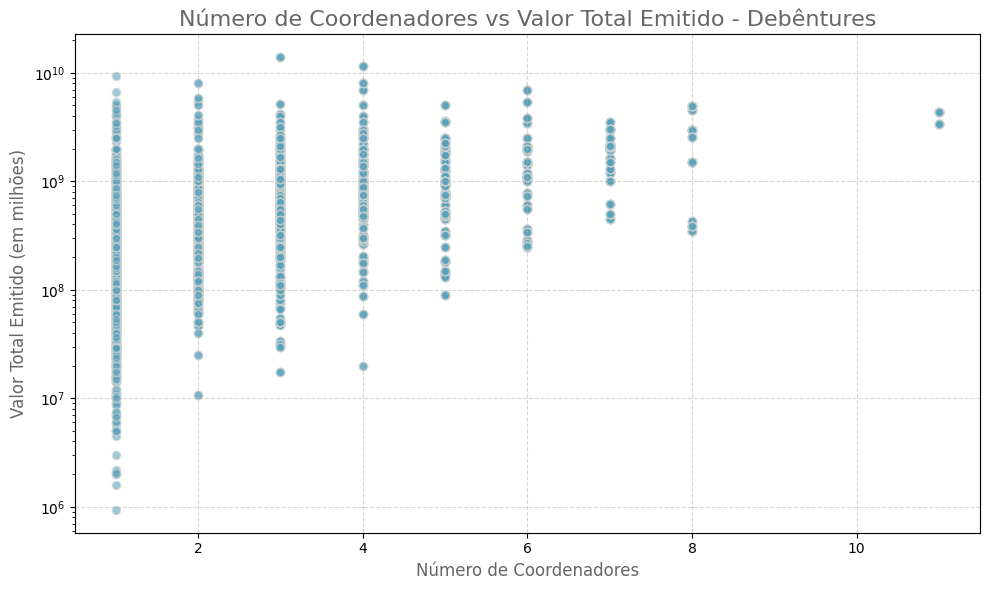


Debêntures:
Teste t de Student - t = -27.47, p = 0.0000 -> Diferença significativa entre ofertas com um coordenador vs múltiplos.
Correlação de Spearman - Correlação = 0.57, p = 0.0000 -> Correlação positiva entre número de coordenadores e valor emitido.


In [9]:
# Análise separada por tipo de título (TVM)

# Gráfico 1: Número de Coordenadores vs Valor Total Emitido - Debêntures
subset_df_debentures = df[df['TVM'] == 'Debêntures']
plt.figure(figsize=(10, 6))
plt.scatter(subset_df_debentures['Número de coordenadores'], subset_df_debentures['Valor total emitido'], color='#58a3bc', alpha=0.6, edgecolor='#d3d3d3')
plt.title("Número de Coordenadores vs Valor Total Emitido - Debêntures", fontsize=16, color='#666666')
plt.xlabel("Número de Coordenadores", fontsize=12, color='#666666')
plt.ylabel("Valor Total Emitido (em milhões)", fontsize=12, color='#666666')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Testes Estatísticos para Debêntures
um_coordenador_deb = subset_df_debentures[subset_df_debentures['Número de coordenadores'] == 1]['Valor total emitido']
multiplos_coordenadores_deb = subset_df_debentures[subset_df_debentures['Número de coordenadores'] > 1]['Valor total emitido']
t_stat_deb, p_value_ttest_deb = ttest_ind(um_coordenador_deb, multiplos_coordenadores_deb, equal_var=False, nan_policy='omit')

# Teste de correlação de Spearman entre número de coordenadores e valor total emitido para Debêntures
spearman_corr_deb, p_value_spearman_deb = spearmanr(subset_df_debentures['Número de coordenadores'], subset_df_debentures['Valor total emitido'], nan_policy='omit')

# Exibir resultados para Debêntures
print("\nDebêntures:")
print(f"Teste t de Student - t = {t_stat_deb:.2f}, p = {p_value_ttest_deb:.4f} -> Diferença significativa entre ofertas com um coordenador vs múltiplos.")
print(f"Correlação de Spearman - Correlação = {spearman_corr_deb:.2f}, p = {p_value_spearman_deb:.4f} -> Correlação positiva entre número de coordenadores e valor emitido.")


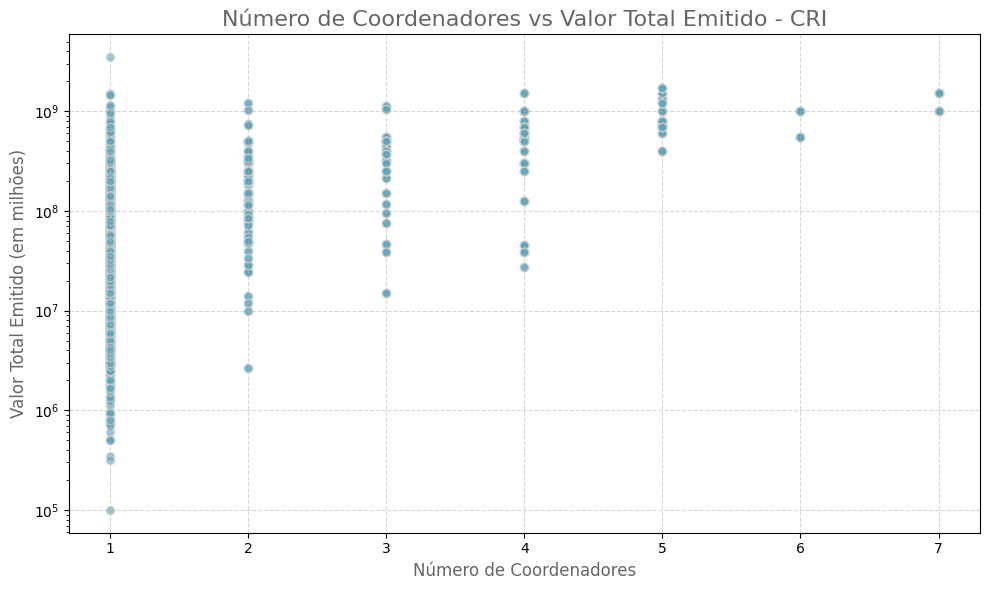


CRI:
Teste t de Student - t = -19.22, p = 0.0000 -> Diferença significativa entre ofertas com um coordenador vs múltiplos.
Correlação de Spearman - Correlação = 0.50, p = 0.0000 -> Correlação positiva entre número de coordenadores e valor emitido.


In [10]:
# Gráfico 2: Número de Coordenadores vs Valor Total Emitido - CRI
subset_df_cri = df[df['TVM'] == 'CRI']
plt.figure(figsize=(10, 6))
plt.scatter(subset_df_cri['Número de coordenadores'], subset_df_cri['Valor total emitido'], color='#58a3bc', alpha=0.6, edgecolor='#d3d3d3')
plt.title("Número de Coordenadores vs Valor Total Emitido - CRI", fontsize=16, color='#666666')
plt.xlabel("Número de Coordenadores", fontsize=12, color='#666666')
plt.ylabel("Valor Total Emitido (em milhões)", fontsize=12, color='#666666')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Testes Estatísticos para CRI
um_coordenador_cri = subset_df_cri[subset_df_cri['Número de coordenadores'] == 1]['Valor total emitido']
multiplos_coordenadores_cri = subset_df_cri[subset_df_cri['Número de coordenadores'] > 1]['Valor total emitido']
t_stat_cri, p_value_ttest_cri = ttest_ind(um_coordenador_cri, multiplos_coordenadores_cri, equal_var=False, nan_policy='omit')

# Teste de correlação de Spearman entre número de coordenadores e valor total emitido para CRI
spearman_corr_cri, p_value_spearman_cri = spearmanr(subset_df_cri['Número de coordenadores'], subset_df_cri['Valor total emitido'], nan_policy='omit')

# Exibir resultados para CRI
print("\nCRI:")
print(f"Teste t de Student - t = {t_stat_cri:.2f}, p = {p_value_ttest_cri:.4f} -> Diferença significativa entre ofertas com um coordenador vs múltiplos.")
print(f"Correlação de Spearman - Correlação = {spearman_corr_cri:.2f}, p = {p_value_spearman_cri:.4f} -> Correlação positiva entre número de coordenadores e valor emitido.")

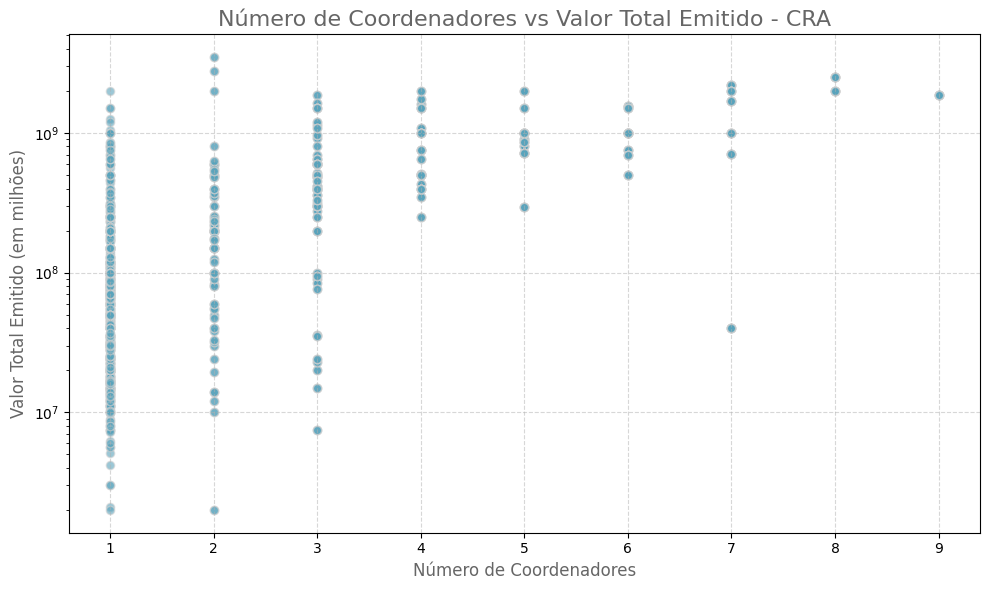


CRA:
Teste t de Student - t = -21.02, p = 0.0000 -> Diferença significativa entre ofertas com um coordenador vs múltiplos.
Correlação de Spearman - Correlação = 0.69, p = 0.0000 -> Correlação positiva entre número de coordenadores e valor emitido.


In [11]:
# Gráfico 3: Número de Coordenadores vs Valor Total Emitido - CRA
subset_df_cra = df[df['TVM'] == 'CRA']
plt.figure(figsize=(10, 6))
plt.scatter(subset_df_cra['Número de coordenadores'], subset_df_cra['Valor total emitido'], color='#58a3bc', alpha=0.6, edgecolor='#d3d3d3')
plt.title("Número de Coordenadores vs Valor Total Emitido - CRA", fontsize=16, color='#666666')
plt.xlabel("Número de Coordenadores", fontsize=12, color='#666666')
plt.ylabel("Valor Total Emitido (em milhões)", fontsize=12, color='#666666')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Testes Estatísticos para CRA
um_coordenador_cra = subset_df_cra[subset_df_cra['Número de coordenadores'] == 1]['Valor total emitido']
multiplos_coordenadores_cra = subset_df_cra[subset_df_cra['Número de coordenadores'] > 1]['Valor total emitido']
t_stat_cra, p_value_ttest_cra = ttest_ind(um_coordenador_cra, multiplos_coordenadores_cra, equal_var=False, nan_policy='omit')

# Teste de correlação de Spearman entre número de coordenadores e valor total emitido para CRA
spearman_corr_cra, p_value_spearman_cra = spearmanr(subset_df_cra['Número de coordenadores'], subset_df_cra['Valor total emitido'], nan_policy='omit')

# Exibir resultados para CRA
print("\nCRA:")
print(f"Teste t de Student - t = {t_stat_cra:.2f}, p = {p_value_ttest_cra:.4f} -> Diferença significativa entre ofertas com um coordenador vs múltiplos.")
print(f"Correlação de Spearman - Correlação = {spearman_corr_cra:.2f}, p = {p_value_spearman_cra:.4f} -> Correlação positiva entre número de coordenadores e valor emitido.")

Gráficos de Dispersão

    CRA: O scatter plot mostra que, em geral, ofertas com múltiplos coordenadores têm valores emitidos mais altos, com uma clara presença de valores elevados em ofertas com 2 ou mais coordenadores.
    CRI: A relação entre o número de coordenadores e o valor total emitido também é positiva, embora menos pronunciada que em CRAs, sugerindo um leve aumento no valor emitido com o aumento de coordenadores.
    Debêntures: Esse título mostra uma tendência consistente com valores altos em ofertas com mais de um coordenador, confirmando que a presença de múltiplos coordenadores pode estar associada a uma maior captação.

Testes de Hipótese

    Teste t de Student:
        CRA: t = -21.02, p < 0.001. Há uma diferença estatisticamente significativa entre ofertas com um coordenador versus múltiplos coordenadores em relação ao valor total emitido.
        CRI: t = -19.22, p < 0.001. Ofertas com múltiplos coordenadores tendem a apresentar valores mais altos de emissão.
        Debêntures: t = -27.47, p < 0.001. A diferença é ainda mais pronunciada, com múltiplos coordenadores associados a valores de emissão significativamente maiores.

    Correlação de Spearman:
        CRA: Correlação = 0.69, p < 0.001. Existe uma correlação moderada positiva entre o número de coordenadores e o valor total emitido.
        CRI: Correlação = 0.50, p < 0.001. A correlação é positiva, mas menos intensa do que em CRAs.
        Debêntures: Correlação = 0.57, p < 0.001. A correlação é moderada, indicando que o número de coordenadores tem uma influência consistente no aumento dos valores emitidos.

Conclusão

Esses resultados confirmam que, em geral, a presença de múltiplos coordenadores está associada a valores de emissão mais altos, especialmente em Debêntures e CRAs. Essa relação é estatisticamente significativa e mostra uma correlação positiva em todos os tipos de títulos, sugerindo que a participação de mais coordenadores contribui para uma captação mais robusta. ​
​

# Módulo 1.1: Análise do Papel dos Coordenadores no Valor Total Emitido

Introdução:

Este submódulo analisa o papel de cada coordenador no valor total emitido, reconhecendo que o valor de ofertas com múltiplos coordenadores reflete uma captação compartilhada. Em vez de atribuir o valor total a um único coordenador, as perguntas a seguir avaliam a contribuição média, a frequência de participação e o impacto geral de cada coordenador. Esse enfoque revela o peso relativo de cada instituição no mercado de captação.


Quais coordenadores mais contribuíram para o valor total emitido, considerando as emissões compartilhadas?

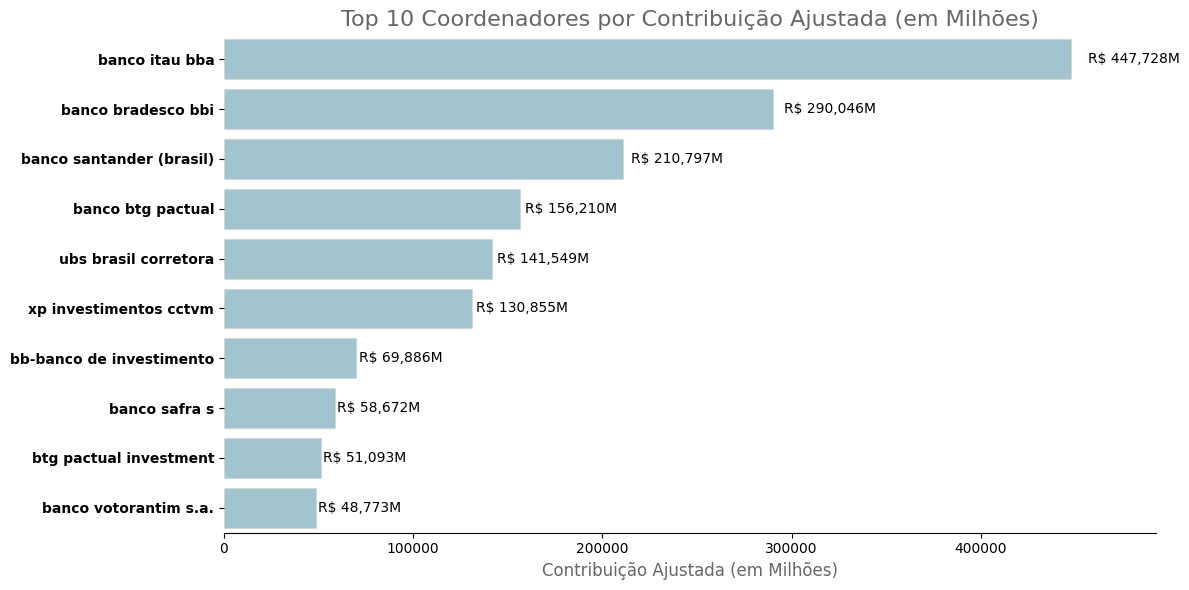

In [12]:
# Calcular a contribuição ajustada dividindo o valor total emitido pelo número de coordenadores para cada oferta
df['Contribuicao_Ajustada'] = df['Valor total emitido'] / df['Número de coordenadores']

# Somar a contribuição ajustada para cada coordenador e dividir o valor por 1 milhão
contribuicao_por_coordenador = df.groupby('Coordenador')['Contribuicao_Ajustada'].sum().reset_index()
contribuicao_por_coordenador['Contribuicao_Ajustada'] /= 1_000_000  # Dividir por 1 milhão para exibir em milhões

# Ordenar e selecionar o top 10 coordenadores por contribuição ajustada
top_10_coordenadores = contribuicao_por_coordenador.sort_values(by='Contribuicao_Ajustada', ascending=False).head(10)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    y=top_10_coordenadores['Coordenador'],
    x=top_10_coordenadores['Contribuicao_Ajustada'],
    palette=['#58a3bc'],
    edgecolor='#d3d3d3',
    linewidth=0.8,
    alpha=0.6
)

# Ajuste dos limites do eixo X
plt.xlim(0, top_10_coordenadores['Contribuicao_Ajustada'].max() * 1.1)

# Adicionando os valores ao lado das barras
for i, value in enumerate(top_10_coordenadores['Contribuicao_Ajustada']):
    plt.annotate(
        f'R$ {value:,.0f}M',  # Valor formatado
        xy=(value, i),  # Coordenadas no final da barra
        xytext=(value * 1.02, i),  # Ajuste para afastar ligeiramente
        textcoords='data',
        color='black',
        va='center',
        fontsize=10
    )

# Remover a linha da esquerda e a régua de valores do eixo y
sns.despine(left=True)

# Ajustar o eixo y para mostrar apenas as primeiras três palavras de cada coordenador
ax.set_yticklabels([' '.join(str(x).split()[:3]) for x in top_10_coordenadores['Coordenador']],
                   fontweight='bold', fontsize=10)

# Configurar título e rótulos
plt.title('Top 10 Coordenadores por Contribuição Ajustada (em Milhões)', fontsize=16, color='#666666')
plt.xlabel('Contribuição Ajustada (em Milhões)', fontsize=12, color='#666666')
ax.set_ylabel('')

plt.tight_layout()
plt.show()


In [13]:
top_10_coordenadores.sort_values(by='Contribuicao_Ajustada', ascending=False)

,Coordenador,Contribuicao_Ajustada
31,banco itau bba s.a.,447728.076925
15,banco bradesco bbi s.a.,290046.296742
48,banco santander (brasil) s.a.,210797.342372
17,banco btg pactual s.a.,156209.560510
152,"ubs brasil corretora de cambio, títulos e valo...",141549.230352
160,xp investimentos cctvm s.a.,130854.606256
56,bb-banco de investimento s.a.,69886.154117
46,banco safra s a,58672.434406
66,btg pactual investment banking ltda.,51093.385943
52,banco votorantim s.a.,48772.980751


Qual é o impacto médio de cada coordenador no valor total emitido nas ofertas em que participa?

In [14]:
# Calcular o impacto médio (média da contribuição ajustada) e o número de participações de cada coordenador
impacto_medio_e_participacoes = df.groupby('Coordenador').agg(
    Valor_Medio_Emitido=('Contribuicao_Ajustada', 'mean'),
    Quantidade_Participacoes=('Contribuicao_Ajustada', 'count')
).reset_index()

# Calcular a média de participações
media_participacoes = impacto_medio_e_participacoes['Quantidade_Participacoes'].mean()

# Filtrar os coordenadores com participações acima da média
coordenadores_acima_da_media = impacto_medio_e_participacoes[
    impacto_medio_e_participacoes['Quantidade_Participacoes'] > media_participacoes
]

# Ordenar o resultado pelo valor médio emitido
coordenadores_acima_da_media = coordenadores_acima_da_media.sort_values(by='Valor_Medio_Emitido', ascending=False)

# Exibir o resultado filtrado
coordenadores_acima_da_media.head(10)

,Coordenador,Valor_Medio_Emitido,Quantidade_Participacoes
19,banco citibank s.a.,3.731254e+08,83
15,banco bradesco bbi s.a.,3.400308e+08,853
66,btg pactual investment banking ltda.,3.254356e+08,157
152,"ubs brasil corretora de cambio, títulos e valo...",3.239113e+08,437
31,banco itau bba s.a.,3.232694e+08,1385
17,banco btg pactual s.a.,3.201016e+08,488
48,banco santander (brasil) s.a.,3.090870e+08,682
106,itau bba assessoria financeira s.a,3.054772e+08,108
68,caixa economica federal,3.040800e+08,62
56,bb-banco de investimento s.a.,2.961278e+08,236


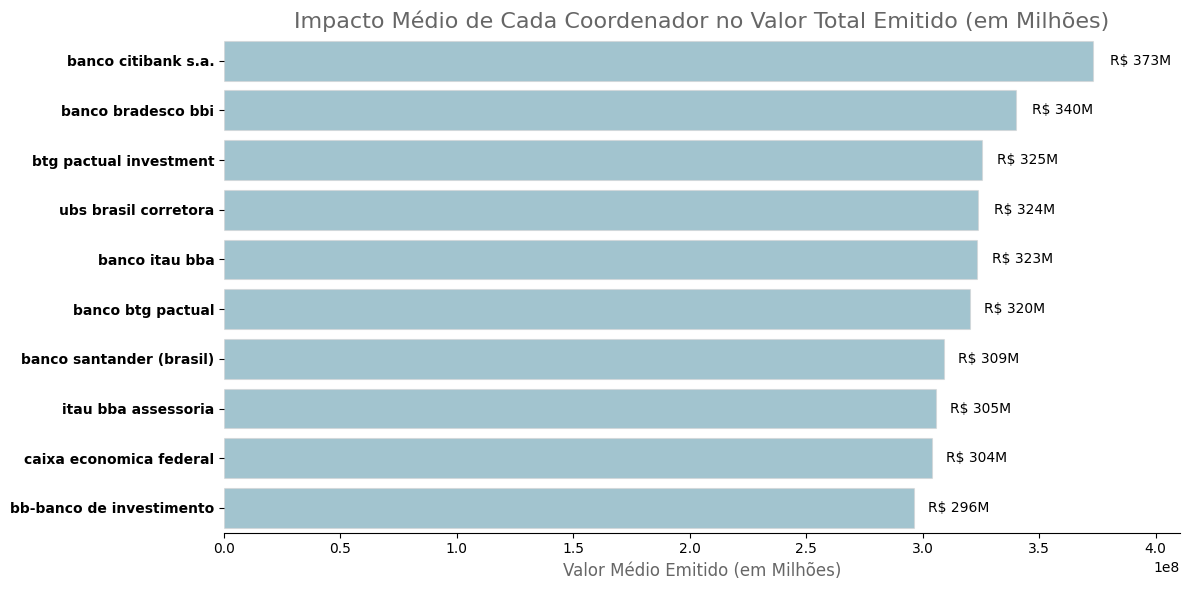

In [15]:
top_10_impacto_medio = coordenadores_acima_da_media.sort_values(by='Valor_Medio_Emitido', ascending=False).head(10)

# Criar o gráfico de barras horizontal
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    y=top_10_impacto_medio['Coordenador'],
    x=top_10_impacto_medio['Valor_Medio_Emitido'],
    palette=['#58a3bc'],
    edgecolor='#d3d3d3',
    linewidth=0.8,
    alpha=0.6
)

# Ajuste dos limites do eixo X
plt.xlim(0, top_10_impacto_medio['Valor_Medio_Emitido'].max() * 1.1)

# Adicionando os valores ao lado das barras
for i, value in enumerate(top_10_impacto_medio['Valor_Medio_Emitido']):
    plt.annotate(
        f'R$ {value / 1_000_000:,.0f}M',  # Valor formatado em milhões
        xy=(value, i),  # Coordenadas no final da barra
        xytext=(value * 1.02, i),  # Ajuste para afastar ligeiramente
        textcoords='data',
        color='black',
        va='center',
        fontsize=10
    )

# Remover a linha da esquerda e a régua de valores do eixo y
sns.despine(left=True)

# Ajustar o eixo y para mostrar apenas as primeiras três palavras de cada coordenador
ax.set_yticklabels([' '.join(str(x).split()[:3]) for x in top_10_impacto_medio['Coordenador']],
                   fontweight='bold', fontsize=10)

# Configurar título e rótulos
plt.title('Impacto Médio de Cada Coordenador no Valor Total Emitido (em Milhões)', fontsize=16, color='#666666')
plt.xlabel('Valor Médio Emitido (em Milhões)', fontsize=12, color='#666666')
ax.set_ylabel('')

plt.tight_layout()
plt.show()


Coordenadores como Citi, Bradesco BBI, e BTG Pactual Investment Banking se destacam com um valor médio emitido mais alto por oferta. Isso indica que, em média, esses coordenadores captam valores significativos quando participam das ofertas.

Os coordenadores mais frequentes também estão entre os maiores em valor total emitido?
        Coordenadores que frequentemente participam das ofertas, como Itaú BBA e Bradesco BBI, não só superam a média de participação, mas também mantêm altos valores médios emitidos, reforçando seu papel central no mercado.

Esses coordenadores refletem tanto frequência quanto impacto financeiro, com instituições de peso no setor destacando-se por suas contribuições repetidas e significativas.

# Módulo 2: Análise Temporal e Sazonalidade
Introdução:
Este módulo identifica padrões temporais nas ofertas, como períodos de alta ou baixa no volume de emissões, e variações no valor captado ao longo do tempo. A análise ajuda a explorar a sazonalidade nas emissões, permitindo um planejamento estratégico que otimiza o timing das ofertas e a captação de recursos.


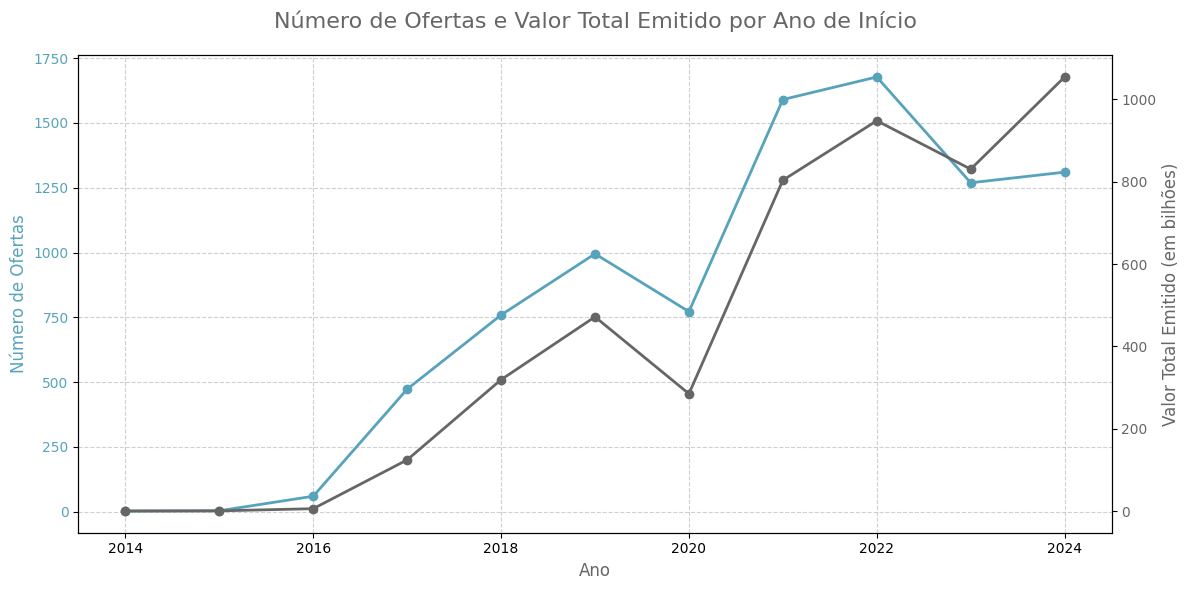

In [16]:
# Convertendo as datas para o formato datetime para análise temporal
df['Data de início da oferta'] = pd.to_datetime(df['Data de início da oferta'], format='%d-%m-%Y')
df['Data de encerramento da oferta'] = pd.to_datetime(df['Data de encerramento da oferta'], format='%d-%m-%Y')

# Criando colunas adicionais para facilitar a análise temporal
df['Ano de início'] = df['Data de início da oferta'].dt.year
df['Ano de encerramento'] = df['Data de encerramento da oferta'].dt.year

# Agrupando as ofertas por ano de início e calculando o número de ofertas e o valor total emitido
ofertas_por_ano = df.groupby('Ano de início').agg({'Código da oferta': 'count', 'Valor total emitido': 'sum'}).reset_index()
ofertas_por_ano.rename(columns={'Código da oferta': 'Número de Ofertas'}, inplace=True)

# Unificando os dois gráficos em uma única figura para comparação
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico 1: Número de Ofertas por Ano de Início
ax1.set_xlabel('Ano', fontsize=12, color='#666666')
ax1.set_ylabel('Número de Ofertas', color='#58a3bc', fontsize=12)
ax1.plot(ofertas_por_ano['Ano de início'], ofertas_por_ano['Número de Ofertas'], marker='o', color='#58a3bc', label='Número de Ofertas', linewidth=2)
ax1.tick_params(axis='y', labelcolor='#58a3bc')
ax1.grid(True, linestyle='--', alpha=0.6)

# Criando um segundo eixo Y para o valor total emitido
ax2 = ax1.twinx()
ax2.set_ylabel('Valor Total Emitido (em bilhões)', color='#666666', fontsize=12)
ax2.plot(ofertas_por_ano['Ano de início'], ofertas_por_ano['Valor total emitido'] / 1e9, marker='o', color='#666666', label='Valor Total Emitido', linewidth=2)
ax2.tick_params(axis='y', labelcolor='#666666')

# Título e exibição do gráfico
plt.title('Número de Ofertas e Valor Total Emitido por Ano de Início', fontsize=16, color='#666666', pad=20)
fig.tight_layout()  # Ajustar para melhor visualização
plt.show()


Aqui está o gráfico combinado, que mostra tanto o Número de Ofertas quanto o Valor Total Emitido por ano, facilitando a visualização conjunta da evolução desses dois aspectos ao longo do tempo.

O eixo azul representa o número de ofertas, enquanto o eixo vermelho representa o valor total emitido. Dessa forma, podemos comparar diretamente se um aumento no número de ofertas reflete um aumento proporcional nos valores captados.

In [ ]:
# Agrupando por ano e tipo de TVM para verificar a evolução ao longo dos anos
sazonalidade_tvm_anos = df.groupby(['Ano de início', 'TVM']).agg({'Código da oferta': 'count'}).reset_index()
sazonalidade_tvm_anos.rename(columns={'Código da oferta': 'Número de Ofertas'}, inplace=True)

# Criando um único gráfico para mostrar a evolução do número de ofertas ao longo dos anos, para cada tipo de título
plt.figure(figsize=(14, 7))

# Plotando cada tipo de título em um único gráfico
cores = ['#58a3bc', '#cafafe', '#666666']  # Aplicando cores padrão
for idx, tvm in enumerate(sazonalidade_tvm_anos['TVM'].unique()):
    subset = sazonalidade_tvm_anos[sazonalidade_tvm_anos['TVM'] == tvm]
    plt.plot(subset['Ano de início'], subset['Número de Ofertas'], marker='o', label=tvm, linewidth=2, color=cores[idx % len(cores)])

# Destacando Crescimento em 2021 e Queda em 2024
# Crescimento em 2021
plt.axvline(x=2021, color='green', linestyle='--', linewidth=1.5, label='Crescimento em 2021')
plt.text(2021, sazonalidade_tvm_anos['Número de Ofertas'].max() * 1.05, 'Crescimento em 2021', color='green', fontsize=10, ha='right')

# Queda em 2024
plt.axvline(x=2024, color='red', linestyle='--', linewidth=1.5, label='Queda em 2024')
plt.text(2024, sazonalidade_tvm_anos['Número de Ofertas'].max() * 1.05, 'Queda em 2024', color='red', fontsize=10, ha='right')

# Ajuste dos limites do eixo X e Y
plt.xlim(sazonalidade_tvm_anos['Ano de início'].min() - 1, sazonalidade_tvm_anos['Ano de início'].max() + 1)
plt.ylim(0, sazonalidade_tvm_anos['Número de Ofertas'].max() * 1.2)

# Adicionando os valores ao lado de cada ponto
for idx, tvm in enumerate(sazonalidade_tvm_anos['TVM'].unique()):
    subset = sazonalidade_tvm_anos[sazonalidade_tvm_anos['TVM'] == tvm]
    for i in range(len(subset)):
        plt.text(subset['Ano de início'].iloc[i], subset['Número de Ofertas'].iloc[i], f"{subset['Número de Ofertas'].iloc[i]}",
                 fontsize=10, color='black', ha='left', va='bottom')

# Configurações do gráfico
plt.xlabel('Ano', fontsize=12, color='#666666')
plt.ylabel('Número de Ofertas', fontsize=12, color='#666666')
plt.title('Evolução do Número de Ofertas ao Longo dos Anos por Tipo de Título', fontsize=16, color='#666666')
plt.grid(False)
plt.legend(title='Tipo de Título', fontsize=12)
plt.xticks(fontsize=10, color='#666666')
plt.yticks(fontsize=10, color='#666666')

plt.tight_layout()
plt.show()


### Análise das Emissões ao Longo dos Anos

#### Crescimento em 2021
Em 2021, houve um crescimento significativo nas emissões de CRI, CRA e Debêntures. Esse aumento pode ser atribuído a fatores como a recuperação econômica pós-pandemia, taxas de juros atrativas e a busca por diversificação de investimentos.

Em 2021, o volume total de emissões no mercado de capitais brasileiro atingiu R$ 722,2 bilhões, o maior montante registrado até então. Para mais informações, acesse [esta notícia do site do governo](https://www.gov.br/cvm/pt-br/assuntos/noticias/2022/emissoes-de-valores-mobiliarios-atingem-r-722-2-bilhoes-em-2021).

#### Queda em 2024 para CRI e CRA
Já em 2024, houve uma queda nas emissões de CRI e CRA. Essa diminuição está relacionada a mudanças regulatórias implementadas pelo Conselho Monetário Nacional (CMN) em fevereiro de 2024, que restringiram as regras para emissão desses títulos.

As novas diretrizes limitaram os lastros elegíveis para CRI e CRA, impactando diretamente o volume de emissões. Em março de 2024, ajustes foram feitos na resolução original, mas o mercado ainda estava se adaptando às novas exigências, resultando em uma queda nas emissões. Para mais detalhes, veja [esta matéria do Valor Investe](https://valorinveste.globo.com/produtos/renda-fixa/cri-e-cra/noticia/2024/03/01/mudancas-em-cri-e-cra-cmn-resolucao-regras-lastros-elegiveis-emissao.ghtml).


In [ ]:
# Agrupando as ofertas por mês (ignorando o ano) e calculando o número total de ofertas e o valor total emitido
df['Mês'] = df['Data de início da oferta'].dt.month

# Agrupando por mês para obter o total de ofertas e valor emitido independentemente do ano
ofertas_por_mes_agrupado = df.groupby('Mês').agg({'Código da oferta': 'count', 'Valor total emitido': 'sum'}).reset_index()
ofertas_por_mes_agrupado.rename(columns={'Código da oferta': 'Número de Ofertas'}, inplace=True)


In [ ]:
# Definindo uma função para categorizar cada mês em uma estação do ano
def obter_estacao_do_ano(mes):
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    elif mes in [9, 10, 11]:
        return 'Primavera'

# Aplicando a função ao DataFrame para adicionar uma coluna com a estação do ano
ofertas_por_mes_agrupado['Estação'] = ofertas_por_mes_agrupado['Mês'].apply(obter_estacao_do_ano)

# Definindo cores para cada estação de acordo com o padrão visual solicitado
cores_estacoes = {
    'Verão': '#58a3bc',
    'Outono': '#cafafe',
    'Inverno': '#666666',
    'Primavera': '#d3d3d3'
}

# Gráfico 1: Número de Ofertas por Mês, com cores por Estação do Ano
plt.figure(figsize=(10, 5))
for estacao, grupo in ofertas_por_mes_agrupado.groupby('Estação'):
    plt.bar(grupo['Mês'], grupo['Número de Ofertas'], color=cores_estacoes[estacao], label=estacao, edgecolor='#d3d3d3', linewidth=0.8)

plt.xlabel('Mês', fontsize=12, color='#666666')
plt.ylabel('Número de Ofertas', fontsize=12, color='#666666')
plt.title('Número de Ofertas por Mês (Agrupado por Estação)', fontsize=16, color='#666666')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10, color='#666666')
plt.yticks(fontsize=10, color='#666666')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionando legenda sem duplicação
plt.legend(title='Estação do Ano', fontsize=10, loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

# Gráfico 2: Valor Total Emitido por Mês, com cores por Estação do Ano
plt.figure(figsize=(10, 5))
for estacao, grupo in ofertas_por_mes_agrupado.groupby('Estação'):
    plt.bar(grupo['Mês'], grupo['Valor total emitido'], color=cores_estacoes[estacao], label=estacao, edgecolor='#d3d3d3', linewidth=0.8)

plt.xlabel('Mês', fontsize=12, color='#666666')
plt.ylabel('Valor Total Emitido (em bilhões)', fontsize=12, color='#666666')
plt.title('Valor Total Emitido por Mês (Agrupado por Estação)', fontsize=16, color='#666666')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10, color='#666666')
plt.yticks(fontsize=10, color='#666666')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionando legenda sem duplicação
plt.legend(title='Estação do Ano', fontsize=10, loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()


Melhor Mês:

    Número de Ofertas:
        Dezembro teve o maior número de ofertas, com um total de 1019 ofertas emitidas.
    Valor Total Emitido:
        Junho foi o mês com o maior valor total emitido, atingindo 540,68 bilhões.

Isso mostra que, em termos de quantidade de ofertas, o final do ano (Dezembro) é um período de alta atividade, enquanto em termos de valor captado, Junho se destacou.
Melhor Estação do Ano:

    Número de Ofertas:
        Verão (Dezembro, Janeiro, Fevereiro) concentrou um grande número de ofertas, principalmente por causa do forte desempenho em Dezembro.
    Valor Total Emitido:
        Inverno (Junho, Julho, Agosto) destacou-se no valor total emitido, com Junho sendo o principal mês responsável por esse destaque.

Portanto, para o mercado analisado, Dezembro (Verão) é o mês com mais ofertas, e Junho (Inverno) é o mês de maior valor captado. Essa distribuição pode indicar padrões sazonais e variações estratégicas para o lançamento de ofertas ao longo do ano.

In [ ]:
# Agrupando por mês e tipo de TVM para verificar sazonalidade dos tipos de título emitidos
sazonalidade_tvm = df.groupby(['Mês', 'TVM']).agg({'Código da oferta': 'count'}).reset_index()
sazonalidade_tvm.rename(columns={'Código da oferta': 'Número de Ofertas'}, inplace=True)

# Criando um gráfico para cada tipo de título (TVM)
plt.figure(figsize=(14, 7))
cores = ['#58a3bc', '#cafafe', '#666666']  # Aplicando cores padrão
for idx, tvm in enumerate(sazonalidade_tvm['TVM'].unique()):
    subset = sazonalidade_tvm[sazonalidade_tvm['TVM'] == tvm]
    plt.plot(subset['Mês'], subset['Número de Ofertas'], marker='o', label=tvm, linewidth=2, color=cores[idx % len(cores)])

plt.xlabel('Mês', fontsize=14, color='#666666')
plt.ylabel('Número de Ofertas', fontsize=14, color='#666666')
plt.title('Número de Ofertas por Tipo de Título (TVM) ao Longo do Ano', fontsize=18, color='#666666')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionando legenda sem duplicação
plt.legend(title='Tipo de Título', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


Sazonalidade no Tipo de Títulos Emitidos:

    O gráfico mostra a distribuição do número de ofertas de cada tipo de título (CRA, CRI, Debêntures) ao longo do ano. Podemos observar se há meses específicos em que determinados tipos de títulos são mais emitidos.
    Por exemplo, pode haver uma maior concentração de Debêntures em certos meses, enquanto outros tipos como CRI e CRA podem ter picos em períodos diferentes. Esses padrões sugerem que certos tipos de títulos têm uma sazonalidade própria, possivelmente por causa de variáveis econômicas ou eventos financeiros específicos.

In [ ]:
# Agrupando por mês e coordenador para verificar se há sazonalidade na atuação dos coordenadores
sazonalidade_coordenador = df.groupby(['Mês', 'Coordenador']).agg({'Código da oferta': 'count'}).reset_index()
sazonalidade_coordenador.rename(columns={'Código da oferta': 'Número de Ofertas'}, inplace=True)

# Selecionando os cinco coordenadores com maior número total de ofertas
top_coordenadores = sazonalidade_coordenador.groupby('Coordenador')['Número de Ofertas'].sum().nlargest(5).index

# Filtrando apenas os dados dos cinco coordenadores mais atuantes
sazonalidade_coordenador_top = sazonalidade_coordenador[sazonalidade_coordenador['Coordenador'].isin(top_coordenadores)]

# Criando um gráfico para os cinco coordenadores mais atuantes
plt.figure(figsize=(14, 7))
cores = ['#58a3bc', '#cafafe', '#666666', '#000000', '#003366']  # Aplicando as cores padrão com azul bem escuro e preto
marcadores = ['o', 's', 'D', '^', 'v']  # Diferentes marcadores para cada linha
for idx, coordenador in enumerate(top_coordenadores):
    subset = sazonalidade_coordenador_top[sazonalidade_coordenador_top['Coordenador'] == coordenador]
    plt.plot(subset['Mês'], subset['Número de Ofertas'], marker=marcadores[idx % len(marcadores)], linewidth=2, color=cores[idx % len(cores)], alpha=0.8)
    # Adicionando o nome do coordenador ao lado da linha com ajuste para evitar sobreposição
    plt.text(subset['Mês'].iloc[-1] + 0.5, subset['Número de Ofertas'].iloc[-1], coordenador, fontsize=12, color=cores[idx % len(cores)], va='center', ha='left', backgroundcolor='white')

plt.xlabel('Mês', fontsize=14, color='#666666')

plt.title('Número de Ofertas dos Cinco Coordenadores Mais Atuantes ao Longo do Ano', fontsize=18, color='#666666')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')
plt.grid(axis='y', linestyle='--', linewidth=0.8, color='#d3d3d3')

plt.gca().spines['right'].set_visible(False)

plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.show()





Participação de Coordenadores ao Longo do Ano:

    O gráfico mostra a participação dos cinco coordenadores mais atuantes ao longo do ano. Podemos ver como a atividade de cada coordenador varia mês a mês.
    Alguns coordenadores podem ter uma presença mais consistente durante todo o ano, enquanto outros podem se concentrar em períodos específicos. Isso pode indicar uma estratégia mais sazonal de alguns coordenadores ou uma especialização em tipos específicos de ofertas em momentos específicos.

# Módulo 3: Análise por Setor e Segmento
Introdução:
Cada setor econômico tem demandas específicas de captação e preferências por certos tipos de títulos. Este módulo examina o comportamento dos setores e segmentos nas ofertas, identificando setores que mais frequentemente emitem e captam valores expressivos e verificando se há uma preferência por tipos de títulos específicos. Esses insights são úteis para decisões estratégicas e na formulação de propostas direcionadas.
Perguntas:



1.	Quais setores mais contribuem para o valor total emitido e para o número de ofertas?

In [ ]:
# Garantindo unicidade e agrupando os dados (se necessário)
contribuicao_setores = df.drop_duplicates(subset=['Código da oferta']).groupby(
    'Setor ANBIMA emissor ou devedor'
).agg({
    'Quantidade total emitida da oferta': 'sum',
    'Valor total emitido': 'sum'
}).reset_index()

# Ordenando pelos números de ofertas
contribuicao_setores = contribuicao_setores.sort_values(by='Quantidade total emitida da oferta', ascending=False)

# Criando o gráfico com a ordenação correta
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de barras para o número de ofertas por setor
ax1.bar(
    contribuicao_setores['Setor ANBIMA emissor ou devedor'],
    contribuicao_setores['Quantidade total emitida da oferta'],
    color='#58a3bc', alpha=0.6, edgecolor='#d3d3d3', linewidth=0.8
)
ax1.set_xlabel('Setor ANBIMA emissor ou devedor', fontsize=12, color='#666666')
ax1.set_ylabel('Número de Ofertas', fontsize=12, color='#666666')
ax1.tick_params(axis='y', labelcolor='#666666')
ax1.set_xticklabels(contribuicao_setores['Setor ANBIMA emissor ou devedor'], rotation=45, ha='right', fontsize=10, color='#666666')
ax1.grid(False)

# Criando um segundo eixo Y para o valor total emitido
ax2 = ax1.twinx()
ax2.plot(
    contribuicao_setores['Setor ANBIMA emissor ou devedor'],
    contribuicao_setores['Valor total emitido'] / 1e9,  # Convertendo para bilhões
    marker='o', color='#444444', linewidth=2, alpha=0.8
)
ax2.set_ylabel('Valor Total Emitido (em bilhões)', fontsize=12, color='#444444')
ax2.tick_params(axis='y', labelcolor='#444444')

# Título e configurações gerais
plt.title('Contribuição dos Setores para o Valor Total Emitido e Número de Ofertas (Ordenado por Número de Ofertas)', fontsize=16, color='#666666', pad=20)
fig.tight_layout()

# Exibindo o gráfico
plt.show()


In [ ]:
contribuicao_setores

In [ ]:
# Filtrando novamente para debêntures e garantindo unicidade por Código da Oferta
debentures_df = df[df['TVM'] == 'Debêntures']
debentures_unicas = debentures_df.drop_duplicates(subset=['Código da oferta'])

# Criando agrupamento para emissões únicas por setor
emissoes_recorrentes = debentures_unicas.groupby(['Setor ANBIMA emissor ou devedor', 'Código da oferta']).size().reset_index(name='num_emissoes')

# Somando as emissões recorrentes por setor considerando apenas registros únicos
emissoes_recorrentes_setor = emissoes_recorrentes.groupby('Setor ANBIMA emissor ou devedor')['num_emissoes'].sum().reset_index()

# Ordenando os setores por número de emissões recorrentes
emissoes_recorrentes_setor = emissoes_recorrentes_setor.sort_values(by='num_emissoes', ascending=False)

# Criando o degradê
def gerar_degrade_cores(base_colors, n_colors):
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", base_colors, N=n_colors)
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]

# Definindo o degradê
base_colors = ['#58a3bc', '#cafafe', '#666666', '#d3d3d3']
colors = gerar_degrade_cores(base_colors, len(emissoes_recorrentes_setor))

# Criar o gráfico ajustado para emissões únicas
plt.figure(figsize=(14, 8))

sns.barplot(
    data=emissoes_recorrentes_setor,
    x='num_emissoes',
    y='Setor ANBIMA emissor ou devedor',
    palette=colors
)

plt.title('Quantidade de Emissões Recorrentes por Setor (Debêntures - Unicidade)', fontsize=16, color='#666666', weight='bold')
plt.xlabel('Quantidade de Emissões Recorrentes', fontsize=12, color='#666666')
plt.ylabel('Setor ANBIMA', fontsize=12, color='#666666')
plt.tight_layout()

# Adicionando os valores ao lado das barras
for index, value in enumerate(emissoes_recorrentes_setor['num_emissoes']):
    plt.text(value + 0.1, index, f'{value}', color='black', va='center', fontsize=10)

plt.show()


O que são emissões recorrentes?

    No contexto dos títulos, como as debêntures, uma emissão recorrente ocorre quando uma mesma oferta é realizada em várias rodadas ou etapas ao longo do tempo.
    Por exemplo, uma empresa pode emitir um lote inicial de debêntures e, posteriormente, realizar novas emissões com o mesmo código da oferta, geralmente para captar mais recursos ou complementar a emissão original.

O que o gráfico Quantidade de Emissões Recorrentes por Setor mostra?

    O gráfico mostra quais setores estão mais propensos a realizar várias rodadas de emissão para uma mesma oferta de debêntures.
    Ou seja, ele indica quantas vezes cada setor voltou ao mercado para emitir mais debêntures usando o mesmo código de oferta.

Por que isso é relevante?

    Estratégia Continuada de Captação: Setores que aparecem com um número elevado de emissões recorrentes podem estar adotando uma estratégia de captação contínua. Isso significa que eles estão frequentemente voltando ao mercado, possivelmente para ajustar suas necessidades de capital de acordo com a demanda do mercado ou aproveitar melhores condições.
    Flexibilidade Financeira: Esses setores podem precisar de maior flexibilidade financeira, emitindo em rodadas menores ao invés de uma grande emissão de uma vez só. Esse comportamento pode ser estratégico para se adaptar a condições econômicas ou para evitar um grande endividamento em um único momento.

In [ ]:

# Agrupando pelos segmentos ANBIMA e somando o valor total emitido
segmentos_contribuicao = debentures_unicas.groupby('Segmento ANBIMA emissor ou devedor')['Valor total emitido'].sum().reset_index()

# Ordenando os segmentos pelo valor total emitido em ordem decrescente
segmentos_contribuicao = segmentos_contribuicao.sort_values(by='Valor total emitido', ascending=False)

# Preparando os dados para o Top 15 Segmentos
top_15_segmentos = segmentos_contribuicao.head(15)

# Criando o degradê personalizado para o Top 15
colors_base = ['#666666', '#58a3bc', '#cafafe']  # Degradê do cinza ao azul claro
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", colors_base)

# Normalizando os índices para aplicar o degradê
norm = mcolors.Normalize(vmin=0, vmax=len(top_15_segmentos)-1)
colors = [cmap(norm(i)) for i in range(len(top_15_segmentos))]

# Criando o gráfico para o Top 15 Segmentos com o degradê
plt.figure(figsize=(14, 10))

sns.barplot(
    data=top_15_segmentos,
    x='Valor total emitido',
    y='Segmento ANBIMA emissor ou devedor',
    palette=colors  # Aplicando o degradê
)

# Configurações do gráfico
plt.title('Top 15 Segmentos ANBIMA pelo Valor Total Emitido (Debêntures)', fontsize=16, color='#666666', weight='bold')
plt.xlabel('Valor Total Emitido (em bilhões)', fontsize=12, color='#666666')
plt.ylabel('Segmento ANBIMA', fontsize=12, color='#666666')
plt.tight_layout()

# Ajustando os limites do eixo X para espaço extra
plt.xlim(0, top_15_segmentos['Valor total emitido'].max() * 1.1)

# Adicionando os valores ao lado das barras
for i, value in enumerate(top_15_segmentos['Valor total emitido']):
    plt.annotate(
        f'{value / 1e9:.2f} B',  # Converter para bilhões e formatar
        xy=(value, i),  # Coordenadas no final da barra
        xytext=(value * 1.02, i),  # Ajuste proporcional para afastar ligeiramente
        textcoords='data',
        color='black',
        va='center',
        fontsize=10
    )

plt.show()




Contribuição por Segmento - Valor Total Emitido:

    O gráfico apresenta quais segmentos ANBIMA contribuíram mais significativamente para o valor total emitido, revelando os principais segmentos na captação via debêntures.